This is how much space the figure will take up on letter paper


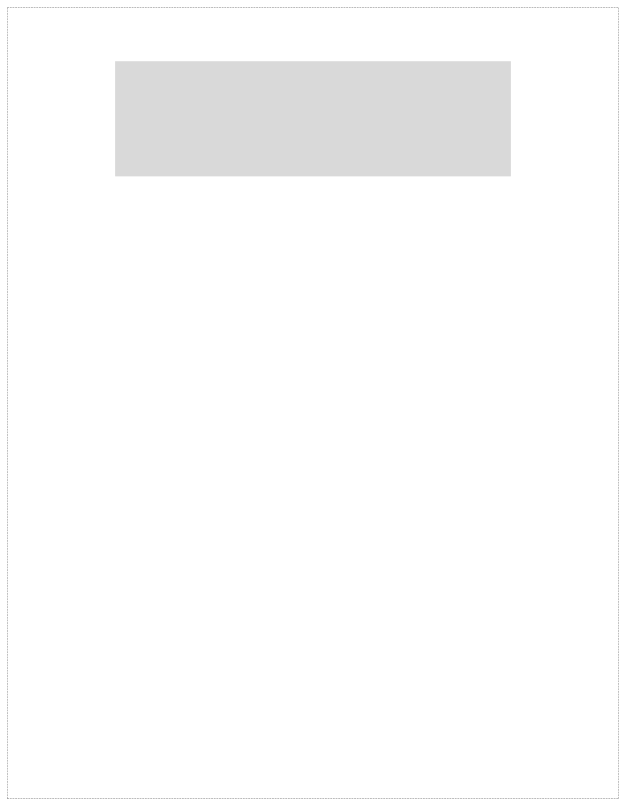

In [1]:
__PRODUCTION__ = 0
__NAME__       = 'motivation'
__WIDTH__      = 5.5  # NeurIPS 2021 text box width
__HEIGHT__     = 1.6

if __PRODUCTION__:
    from mplmagic import pgf
else:
    from mplmagic import svg

from mplmagic.util import SuperFigure, SuperAxes, size_hint
import matplotlib.pyplot as plt

print('This is how much space the figure will take up on letter paper')
size_hint(__WIDTH__, __HEIGHT__, margin_left=0.5 * (8.5 - __WIDTH__));

Square asymetric noise

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2
from symfac.experimental import RBFExpansionMiniBatch

In [3]:
n = 1024
bs = 200
num_iters = 25000
errors = []
torch.manual_seed(0)
target = torch.normal(0.0, 1.0, (n, n))

In [ ]:
import time
torch.manual_seed(time.time())

for k in [64,128,512]:
    print(k)
    u0=1/1000*torch.randn([bs, target.shape[0], k], device="cpu") 
    v0=1/1000*torch.randn([bs, target.shape[1], k], device="cpu") 
    a=torch.randn([bs, k], device="cpu")
    b=torch.randn([bs], device="cpu")
    
    fac_mini = RBFExpansionMiniBatch(k=k, mini_batch_size = 8 * target.shape[0], batch_size=bs, max_steps=num_iters, mini_batch_by='elements', device="cpu")
    

    fac_mini.fit(
        target
)
    plt.hist(fac_mini.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac_mini.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))
    plt.imshow( fac_mini.optimum(runs=torch.argmin( fac_mini.report.loss_best)))
    plt.show()
    fac_mini.to_pickle('data/noise_large_{0}.pickle'.format(k))
print(errors)



64


  0%|          | 0/25000 [00:00<?, ?it/s]

In [4]:
errors.append(torch.min(error))
plt.imshow( fac_mini.optimum(runs=torch.argmin( fac_mini.report.loss_best)))
plt.show()
fac_mini.to_pickle('data/noise_large_{0}.pickle'.format(k))

NameError: name 'error' is not defined

In [14]:
s_vals = []
U0, S0, V0 = np.linalg.svd(target.detach().numpy())
for s in range(1, target.shape[0]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), target)),7))

In [15]:
print(s_vals[1-1])
print(s_vals[2-1])
print(s_vals[4-1])
print(s_vals[8-1])
print(s_vals[16-1])
print(s_vals[32-1])
print(s_vals[64-1])
print(s_vals[128-1])
print(s_vals[256-1])
print(s_vals[512-1])



0.9957418
0.9919397
0.9844044
0.969684
0.9411498
0.8870293
0.7891392
0.6233142
0.3763922
0.1064658


NameError: name 'errs' is not defined

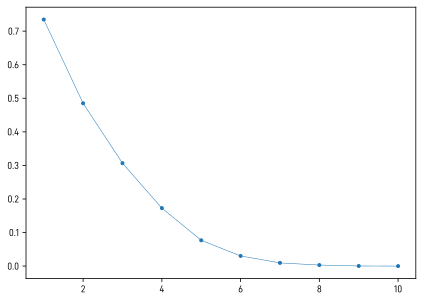

In [13]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(s_vals)+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [14]:
open('gn_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

906

In [15]:
errs, s_vals = pickle.load(open("gn_losses.pickle", "rb"))